In [3]:
import matplotlib.pyplot as plt
import numpy as np
#import torch
#import pyro
#import pyro.distributions as dist
#from models.model_pyro import model,guide

: 

: 

In [6]:
def data_generator(cp,mean1,mean2,noise1,noise2):
    data = []
    for i in range(200):
        if i < cp:
            data.append(int(np.random.random(1)*noise1+mean1))
        else:
            data.append(int(np.random.random(1)*noise2+mean2))
    return data

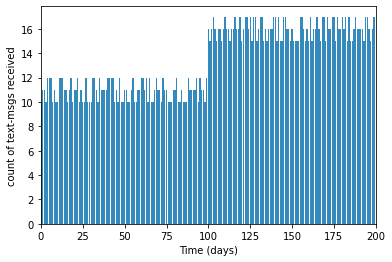

In [7]:
from plot import plot
data1=data_generator(100,10,15,3,3)
plot(data1)

In [4]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, guide, adam, elbo)

In [54]:

for step in range(10000):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data1))
    losses.append(loss)
    #if step % 1000 == 0:
    #    print("Elbo loss: {}".format(loss))
        

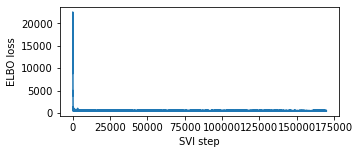

In [55]:
plt.figure(figsize=(5, 2))
plt.plot(losses)
plt.xlabel("SVI step")
plt.ylabel("ELBO loss");

In [56]:
pi= pyro.param("pi").data.cpu().numpy()

In [57]:
from scipy.special import softmax
prob=softmax(pi)

In [58]:
for i in range(len(prob)):
    print(i,prob[i])

0 0.0021366714
1 3.1344e-41
2 7.256589e-39
3 9.674e-41
4 1.71817e-40
5 1.07408e-40
6 1.71515e-40
7 7.84315e-40
8 4.27669e-40
9 1.2804e-40
10 2.67885e-40
11 2.929221e-39
12 3.978836e-37
13 1.9504e-40
14 4.132599e-39
15 8.149249e-10
16 2.7798681e-38
17 1.205963e-39
18 0.0012899099
19 2.4725142e-37
20 1.0239679e-38
21 5.797759e-33
22 1.26029e-40
23 1.6171832e-38
24 0.00019719024
25 1.076311e-39
26 5.211019e-31
27 1.4101539e-33
28 8.881603e-39
29 1.281989e-39
30 1.5518757e-38
31 2.71709e-40
32 2.755e-41
33 7.42009e-40
34 8.2465e-41
35 1.18434e-40
36 2.1349787e-31
37 0.003330008
38 4.776686e-38
39 2.1764e-41
40 8.4527336e-32
41 1.4981347e-37
42 1.2200995e-38
43 1.565557e-39
44 1.6950003e-38
45 1.5300837e-32
46 1.014701e-32
47 0.000375451
48 6.2671923e-35
49 3.9777e-41
50 4.8932725e-05
51 5.9346e-41
52 1.69239e-40
53 1.1571076e-38
54 1.1689888e-38
55 2.266171e-39
56 3.40012e-40
57 1.59625e-40
58 3.02655e-40
59 9.1087e-41
60 2.019253e-39
61 3.23078e-40
62 1.52943e-39
63 3.3337e-41
64 6.113e-4

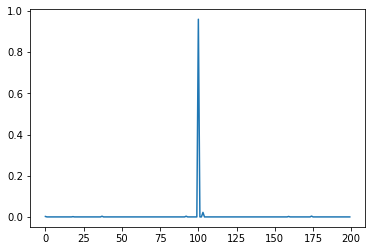

In [59]:
import matplotlib.pyplot as plt


# プロット
plt.plot(prob)


# プロット表示(設定の反映)
plt.show()

In [57]:
a1=pyro.param("a1").data.cpu().numpy()
b1=pyro.param("b1").data.cpu().numpy()

In [58]:
print(a1,b1)

10700.757605740177 106.68338058261186


In [61]:
a2=pyro.param("a2").data.cpu().numpy()
b2=pyro.param("b2").data.cpu().numpy()

In [62]:
print(a2,b2)

1579.665352506125 99.31046622658477
